# PROTEIN CLASSIFICATION ANALYSIS

In this notebook, the ChEMBL database schema is analyzed in order to obtain the classification into protein families of the targets.
We will focus on the **SINGLE PROTEIN** targets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import json
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
import matplotlib.colors as mcolors

%matplotlib inline

In [2]:
df = pd.read_csv('/home/federica/LAB2/protein_class.csv')

target_classes = ['Cytochrome P450', 'ion channel', 'G protein-coupled', 'Kinase', 'Toll-like',
                  'epigenetic regulator', 'Protease', 'Nuclear receptor','methyltransferase','demethylase','Histone deacetylase',
                  'Histone acetyltransferase','Bromodomain','protein tau','Heat shock','transient receptor','GRP','kinase','protease','nuclear receptor',
                  'cytochrome P450','heat shock']

In [3]:

total_counts = {}
for class_name in target_classes:
    mask_pref_name = df['pref_name'].str.contains(class_name, case=False, na=False)
    mask_class_name = df['protein_class_name'].str.contains(class_name, case=False, na=False)
    mask_description = df['protein_class_description'].str.contains(class_name, case=False, na=False)
    
    combined_mask = mask_pref_name | mask_class_name | mask_description
    total_counts[class_name] = combined_mask.sum()

total_counts_df = pd.DataFrame(total_counts.items(), columns=['Class', 'Count'])

fig = go.Figure(data=[go.Table(
    header=dict(values=['Class', 'Count'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[total_counts_df['Class'], total_counts_df['Count']],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [4]:
total_counts = {}
target_lists = {}
for class_name in target_classes:

    mask_pref_name = df['pref_name'].str.contains(class_name, case=False, na=False)
    mask_class_name = df['protein_class_name'].str.contains(class_name, case=False, na=False)
    mask_description = df['protein_class_description'].str.contains(class_name, case=False, na=False)
    
    combined_mask = mask_pref_name | mask_class_name | mask_description
    
    total_counts[class_name] = combined_mask.sum()
    
    target_lists[class_name] = df[combined_mask]['chembl_id'].unique().tolist()

total_counts_df = pd.DataFrame(total_counts.items(), columns=['Class', 'Count'])
total_counts_df['Targets'] = total_counts_df['Class'].map(lambda x: ', '.join(target_lists[x]))

fig = go.Figure(data=[go.Table(
    header=dict(values=['Class', 'Count', 'Targets'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[total_counts_df['Class'], total_counts_df['Count'], total_counts_df['Targets']],
               fill_color='lavender',
               align='left'))
])

fig.show()

## File saving 

Two separate files are generated the first **'protein_class_with'** containing only the targets belonging to the selected protein families. The second **'protein_class_without'** with all other families found in ChEMBL.

In [5]:
target_lists = {}
is_in=[]
for class_name in target_classes:
    # Crea una maschera booleana per ogni colonna
    mask_pref_name = df['pref_name'].str.contains(class_name, case=False, na=False)
    mask_class_name = df['protein_class_name'].str.contains(class_name, case=False, na=False)
    mask_description = df['protein_class_description'].str.contains(class_name, case=False, na=False)
    
    # Unisci le maschere con l'operatore OR per evitare duplicati
    combined_mask = mask_pref_name | mask_class_name | mask_description
    
    # Crea una lista di target unici
    target_lists[class_name] = df[combined_mask]['chembl_id'].unique().tolist()

all_chembl_ids = [chembl_id for ids in target_lists.values() for chembl_id in ids]
df_filtered = df[~df['chembl_id'].isin(all_chembl_ids)]
if not os.path.exists('/home/federica/LAB2/protein_class_without.csv'):
    df_filtered.to_csv('/home/federica/LAB2/protein_class_without.csv', index=False)
df_with=df[df['chembl_id'].isin(all_chembl_ids)]
if not os.path.exists('/home/federica/LAB2/protein_class_with.csv'):
    df_with.to_csv('/home/federica/LAB2/protein_class_with.csv', index=False)

## Creating statistics for classification into protein families

Once the mutations are studied and the data are divided according to quality, statistical analyses are performed regarding the membership of molecules in protein families.

In [6]:
def load_and_concat(folder_path):

    dataframes = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [7]:
#wild type files
wild_type_1 = '/home/federica/LAB2/data_202410161138_protein/wild_type/wild_type_1'
wild_type_2 = '/home/federica/LAB2/data_202410161138_protein/wild_type/wild_type_2'
wild_type_3 = '/home/federica/LAB2/data_202410161138_protein/wild_type/wild_type_3'

#mutantion target files
mutation_target_1 = '/home/federica/LAB2/data_202410161138_protein/mutation_target/mutation_target_1'
mutation_target_2 = '/home/federica/LAB2/data_202410161138_protein/mutation_target/mutation_target_2'
mutation_target_3 = '/home/federica/LAB2/data_202410161138_protein/mutation_target/mutation_target_3'

#mixed files
mixed_1 = '/home/federica/LAB2/data_202410161138_protein/mixed/mixed_1'
mixed_2 = '/home/federica/LAB2/data_202410161138_protein/mixed/mixed_2'
mixed_3 = '/home/federica/LAB2/data_202410161138_protein/mixed/mixed_3'

In [8]:
wild_type_1 = load_and_concat(wild_type_1)
wild_type_2 = load_and_concat(wild_type_2)
wild_type_3 = load_and_concat(wild_type_3)

mutation_target_1 = load_and_concat(mutation_target_1)
mutation_target_2 = load_and_concat(mutation_target_2)
mutation_target_3 = load_and_concat(mutation_target_3)

mixed_1 = load_and_concat(mixed_1)
mixed_2 = load_and_concat(mixed_2)
mixed_3 = load_and_concat(mixed_3)


In [9]:
def calculate_protein_stats(df, target_classes, molecule_column='Molecule ChEMBL ID'):
    rows = []
    for protein_class in target_classes:
        class_df = df[
            (df['pref_name'].str.contains(protein_class, case=False, na=False)) |
            (df['protein_class_name'].str.contains(protein_class, case=False, na=False)) |
            (df['protein_class_description'].str.contains(protein_class, case=False, na=False))
        ]

        if not class_df.empty:
            
            class_count = class_df.shape[0]
            target_count = class_df['Target ChEMBL ID'].nunique()
            
            if molecule_column in class_df.columns:
                molecule_count = class_df[molecule_column].nunique()
            else:
                molecule_count = None
            
            class_targets = class_df['Target ChEMBL ID'].unique().tolist()
            
            rows.append({
                'protein_class_name': protein_class,
                'count': class_count,
                'target_count': target_count,
                'molecule_count': molecule_count,
                'targets': class_targets
            })
    
    stats_df = pd.DataFrame(rows)
    
    return stats_df

In [10]:

wild_type_1_stats = calculate_protein_stats(wild_type_1, target_classes)
wild_type_2_stats = calculate_protein_stats(wild_type_2, target_classes)
wild_type_3_stats = calculate_protein_stats(wild_type_3, target_classes)

mutation_target_1_stats = calculate_protein_stats(mutation_target_1, target_classes)
mutation_target_2_stats = calculate_protein_stats(mutation_target_2, target_classes)
mutation_target_3_stats = calculate_protein_stats(mutation_target_3, target_classes)

mixed_1_stats = calculate_protein_stats(mixed_1, target_classes)
mixed_2_stats = calculate_protein_stats(mixed_2, target_classes)
mixed_3_stats = calculate_protein_stats(mixed_3, target_classes)


In [11]:
def create_interactive_table(df, title="Interactive Table"):
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(df[['Group', 'protein_class_name', 'target_count', 'molecule_count']].columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[df[col] for col in df.columns if col != 'targets'and col != 'count'],
                   fill_color='lavender',
                   align='left'))
    ])

    fig.update_layout(
        title=title,
        title_x=0.5
    )

    fig.show()

In [12]:
wild_type_1_stats['Group'] = 'Wild Type 1'
wild_type_2_stats['Group'] = 'Wild Type 2'
wild_type_3_stats['Group'] = 'Wild Type 3'

mutation_target_1_stats['Group'] = 'Mutation Target 1'
mutation_target_2_stats['Group'] = 'Mutation Target 2'
mutation_target_3_stats['Group'] = 'Mutation Target 3'

mixed_1_stats['Group'] = 'Mixed 1'
mixed_2_stats['Group'] = 'Mixed 2'
mixed_3_stats['Group'] = 'Mixed 3'

combined_df = pd.concat([
    wild_type_1_stats, wild_type_2_stats, wild_type_3_stats,
    mutation_target_1_stats, mutation_target_2_stats, mutation_target_3_stats,
    mixed_1_stats, mixed_2_stats, mixed_3_stats
], ignore_index=True)

cols = ['Group'] + [col for col in combined_df.columns if col != 'Group']
combined_df = combined_df[cols]

combined_df['Group'] = combined_df['Group'].where(combined_df['Group'].ne(combined_df['Group'].shift()),"")

In [13]:
create_interactive_table(combined_df, title="Combined Protein Class Statistics")

## Table with activity data and mutation information

In [14]:
protein = pd.read_csv('/home/federica/LAB2/protein_class_with.csv')

whole_data = pd.read_csv('/home/federica/LAB2/data_202410161138_protein/filtered/whole_dataset_out.csv')

In [15]:
merged_data = pd.merge(
    protein[['protein_class_name', 'pref_name', 'chembl_id']],
    whole_data[['Molecule ChEMBL ID', 'Target ChEMBL ID', 'mutant', 'Quality', 'Class']],
    left_on='chembl_id',
    right_on='Target ChEMBL ID',
    how='left'
)

merged_data = merged_data.dropna(subset=['Target ChEMBL ID'])

In [16]:
new_dataframe = pd.DataFrame(columns=['protein_class_description','prot_class_name', 'pref_name', 'Target ChEMBL ID', 
                                      'mutation', 'activity_class_0', 'activity_class_1', 
                                      'activity_class_2', 'n_molecule_1', 'n_molecule_2', 
                                      'n_molecule_3', 'mixed_1', 'mixed_2', 'mixed_3'])

for index, row in protein.iterrows():
    target_data = merged_data[merged_data['chembl_id'] == row['chembl_id']]

    activity_counts = target_data['Class'].value_counts()
    activity_class_0 = activity_counts.get(0, 0)
    activity_class_1 = activity_counts.get(1, 0)
    activity_class_2 = activity_counts.get(2, 0)
    
    quality_counts = target_data['Quality'].value_counts()
    n_molecule_1 = quality_counts.get(1, 0)
    n_molecule_2 = quality_counts.get(2, 0)
    n_molecule_3 = quality_counts.get(3, 0)

    mutations = target_data['mutant'].dropna().unique()
    if len(mutations) > 1:
        mutation_value = list(mutations)
    elif len(mutations) == 1:
        mutation_value = mutations[0]
    else:
        mutation_value = None 
    
    new_row = pd.DataFrame({
        'protein_class_description': [row['protein_class_description']],
        'prot_class_name': [row['protein_class_name']],
        'pref_name': [row['pref_name']],
        'Target ChEMBL ID': [row['chembl_id']],
        'mutation': [mutation_value],
        'activity_class_0': [activity_class_0],
        'activity_class_1': [activity_class_1],
        'activity_class_2': [activity_class_2],
        'n_molecule_1': [n_molecule_1],
        'n_molecule_2': [n_molecule_2],
        'n_molecule_3': [n_molecule_3],
        'mixed_1': [0],
        'mixed_2': [0],
        'mixed_3': [0]
    })
    new_dataframe = pd.concat([new_dataframe, new_row], ignore_index=True)
    
for mixed_df, col in zip([mixed_1, mixed_2, mixed_3], ['mixed_1', 'mixed_2', 'mixed_3']):
    for index, row in new_dataframe.iterrows():
        target_id = row['Target ChEMBL ID']
        count = mixed_df[mixed_df['Target ChEMBL ID'] == target_id].shape[0]
        new_dataframe.at[index, col] = count

new_dataframe = new_dataframe.sort_values(by='protein_class_description', ascending=True)
new_dataframe.to_csv('/home/federica/LAB2/protein_class_with_activity.csv', index=False)
new_dataframe


,protein_class_description,prot_class_name,pref_name,Target ChEMBL ID,mutation,activity_class_0,activity_class_1,activity_class_2,n_molecule_1,n_molecule_2,n_molecule_3,mixed_1,mixed_2,mixed_3
813,cytosolic other,Other cytosolic protein,Heat shock factor protein 1,CHEMBL5869,None,0,0,1,0,1,0,2,4,124
1169,cytosolic other,Other cytosolic protein,Heat shock 70 kDa protein 6,CHEMBL3232688,None,0,0,0,0,0,0,0,0,0
823,cytosolic other,Other cytosolic protein,Heat shock protein beta-1,CHEMBL5976,None,0,0,0,0,0,0,3,0,25
598,cytosolic other,Other cytosolic protein,Breakpoint cluster region protein,CHEMBL5146,None,0,0,0,0,0,0,9,0,124
681,cytosolic other,Other cytosolic protein,Heat shock 70 kDa protein 1,CHEMBL5460,None,0,0,0,0,0,0,118,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,unclassified,Unclassified protein,Aurora kinase A-interacting protein,CHEMBL5910,None,0,0,0,0,0,0,0,0,0
1303,unclassified,Unclassified protein,Putative heat shock protein HSP 90-beta 2,CHEMBL4105858,None,0,0,0,0,0,0,0,0,125
784,unclassified,Unclassified protein,Cyclin-dependent kinase 2-associated protein 2,CHEMBL6010,None,0,0,0,0,0,0,0,2,0
691,unclassified,Unclassified protein,Mitogen-activated protein kinase kinase kinase...,CHEMBL5605,None,0,0,0,0,0,0,0,36,0


In [17]:
def assign_family(row, target_classes):
    for target_class in target_classes:
        if (target_class in str(row['prot_class_name']) or
            target_class in str(row['pref_name']) or
            target_class in str(row['protein_class_description'])):
            return target_class
    return None 


new_dataframe['family'] = new_dataframe.apply(lambda row: assign_family(row, target_classes), axis=1)

cols = ['family'] + [col for col in new_dataframe.columns if col != 'family']
new_dataframe = new_dataframe[cols]

sorted_dataframe = new_dataframe.sort_values(by=['family', 'prot_class_name', 'pref_name'], ascending=True)

if not os.path.exists('/home/federica/LAB2/sorted_new.csv'):
    sorted_dataframe.to_csv('/home/federica/LAB2/sorted_new.csv', index=False)

In [18]:
def create_table(df, title="Interactive Table"):
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(df.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[df[col] for col in df.columns ],
                   fill_color='lavender',
                   align='left'))
    ])

    fig.update_layout(
        title=title,
        title_x=0.5
    )

    fig.show()

In [19]:
df=pd.read_csv('/home/federica/LAB2/sorted_new.csv').head(10)
create_table(df,'activity files and protein families')

## Results with different thresholds

**inactive** > 100 micromolar

**medium active** between 1 micro and 10 micro

**active** below 1 micro

In [35]:
def classify_activity(standard_type, standard_value, standard_units):
    default=['IC50', 'Ki', 'Kd', 'EC50', 'Potency']
    if standard_type not in default or standard_units != 'nM':
        return None  
    if standard_units == 'nM':
        standard_value /= 1000 
    if standard_value > 100:
        return 'inactive'
    elif 1 <= standard_value <= 10:
        return 'medium active'
    elif standard_value < 1:
        return 'active'
    elif 10 < standard_value <= 100:
        return 'excluded'
    return 'excluded'

In [36]:
def count_activity_by_category(df):
    counts = {'inactive': 0, 'medium active': 0, 'active': 0, 'excluded': 0}

    for _, row in df.iterrows():
        activity = classify_activity(row['Standard Type'],row['Standard Value'], row['Standard Units'])
        if activity:
            counts[activity] += 1
    return counts

In [57]:
df = pd.read_csv('/home/federica/LAB2/chembl33_20240216/DOWNLOAD-lL5w6GF0gLQ3_3cTCRIdypanaKFnA4A7bGSsM857udg=.csv', sep=',', low_memory=False)
header = df.columns 
result = []
result.append(count_activity_by_category(df))


In [80]:
file_path = '/home/federica/LAB2/chembl33_20240216/DOWNLOAD-lL5w6GF0gLQ3_3cTCRIdypanaKFnA4A7bGSsM857udg=_part14.csv'
df = pd.read_csv(file_path, sep=';', header=None, low_memory=False, on_bad_lines='skip')
df.columns = header
result.append(count_activity_by_category(df))

In [81]:
df1 = pd.DataFrame(result)
print(df1)

    inactive  medium active  active  excluded
0      15224         144802  104067    260211
1      19480         185641  160680    307982
2      19293         180235  147239    325708
3      17388         179003  143817    322014
4      17405         173237  127206    343746
5      18603         174793  148564    312983
6      21829         209226  157983    393423
7      15453         181315  134379    329177
8      18380         214342  118662    404921
9      17422         170373  149602    298748
10     14119         125172  137228    196657
11     12356          96155  130124    128413
12     11256          83668  118327    100790
13      1864          16735   27637     11916


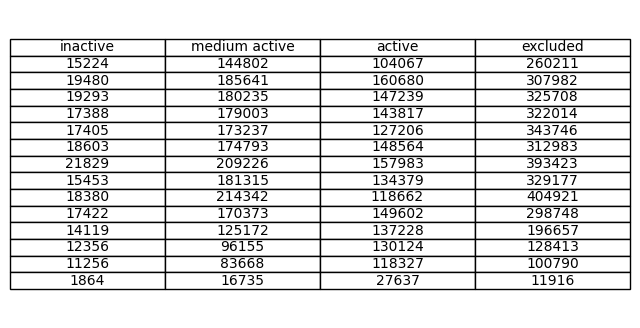

In [82]:
fig, ax = plt.subplots(figsize=(8, 4))  # Dimensioni della tabella
ax.axis('tight')
ax.axis('off')

# Creazione della tabella
table = ax.table(cellText=df1.values, colLabels=df1.columns, cellLoc='center', loc='center')

plt.show() 